# Deep dive into the ArcGIS Python API

 - ## Rohit Singh rsingh@esri.com
 - ## Matthias Schenker m.schenker@esri.ch

# ArcGIS Python API
## What is it?

* Python API to your Web GIS

* Powerful, modern and easy to use

* Implemented using REST + local capabilities

# API Overview
## Pythonic GIS API

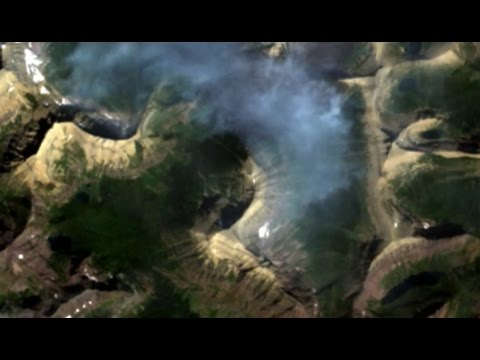

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('SyFebn8ZgbU', width=900, height=510, start=60)

# The GIS Module
<img src="http://esri.github.io/arcgis-python-api/notebooks/nbimages/guide_gis_module_01.png" />

## Connecting to GIS

In [2]:
from arcgis.gis import GIS
from getpass import getpass

In [3]:
arcgis_online = GIS()

In [4]:
portal = GIS('https://dev003246.esri.com/portal', 'admin', 'esri.agp')

In [5]:
gis = GIS('http://deldev.maps.arcgis.com', 'deldev', 'P@ssw0rd@123') #getpass())

# Using GIS resources

## Users

In [6]:
user = gis.users.get('smorehouse')

In [7]:
user

<User username:smorehouse>

In [8]:
user['firstName']

'scott'

In [9]:
user.lastName

'morehouse'

## Querying users

In [10]:
users = portal.users.search()

In [11]:
users

[<User username:admin>,
 <User username:andrew>,
 <User username:arcgis_python_api>,
 <User username:demo_user1>,
 <User username:esri_boundaries>,
 <User username:esri_demographics>,
 <User username:esri_livingatlas>,
 <User username:esri_nav>,
 <User username:publisher1>,
 <User username:publisher2>,
 <User username:system_publisher>,
 <User username:user1>,
 <User username:user2>]

## Listing user content

In [12]:
admin = users[0]

<Item title:"SampleWorldCities" type:WMS owner:admin>

<Item title:"GeocodingTools" type:Geoprocessing Service owner:admin>

<Item title:"ImgSrv_Landast_Montana2014" type:Image Service owner:admin>
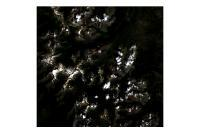

<Item title:"Geometry" type:Geometry Service owner:admin>

<Item title:"bigDataFileShares_NYC_taxi" type:Big Data File Share owner:admin>

<Item title:"SampleWorldCities" type:Map Service owner:admin>

In [111]:
for item in admin.items()[:6]:
    display(item)

## Groups

<Group title:"LA County Emergency Management" owner:demo_deldev>
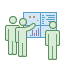

In [14]:
group = gis.groups.search('LA County Emergency Management')[0]
group

<Item title:"Active California Fires" type:Feature Service owner:demo_deldev>
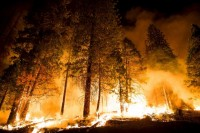

<Item title:"Critical Infrastructure in Southern California" type:Feature Service owner:demo_deldev>
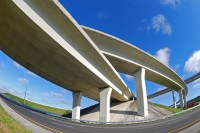

<Item title:"LA County Infrastructure at Risk" type:Web Map owner:demo_deldev>
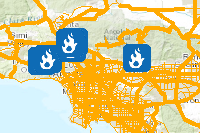

In [15]:
items = group.content()
for item in items: 
    display(item) 

# Content Management

* Add/remove/update items
* Publish web layers
* Share items


## Add an item

In [16]:
properties = {
    "type" : "File Geodatabase",
    "title" : "city locations",
    "tags" : "cities",
    "description" : "Lots of cities"
}
data_path = r"C:\xc\Presentations\brownbagApril2017\cities.zip"
# cities_data = gis.content.add(data=data_path, item_properties=properties)

In [17]:
# cities_data

<Item title:"city locations" type:File Geodatabase owner:deldev>

## Publish the item as a web layer

In [18]:
# cities = cities_data.publish()
# cities.share(True)
# cities

<Item title:"city locations" type:Feature Service owner:deldev>

In [19]:
# cities.delete()
# cities_data.delete()

True

## Searching for items

In [20]:
items = gis.content.search('Chennai')

<Item title:"chennai-rainfall" type:CSV owner:demo_deldev>
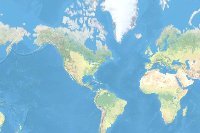

<Item title:"Lakes in Chennai" type:Feature Service owner:deldev>
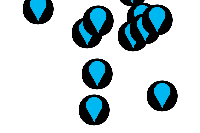

<Item title:"ChennaiFloodsSatellite" type:Feature Service owner:deldev>
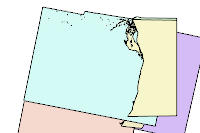

<Item title:"Enriched Chennai Population" type:Feature Service owner:deldev>
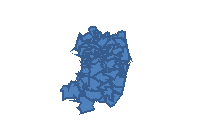

<Item title:"Chennai_Lakes_Map" type:Web Map owner:demo_deldev>
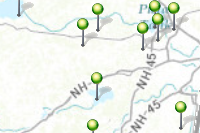

<Item title:"Trace Downstream from Chennai Lakes" type:Feature Service owner:deldev>
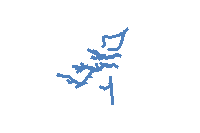

<Item title:"Routes to Chennai Relief Centers" type:Feature Service owner:deldev>

<Item title:"chennai-rainfall" type:Feature Service owner:demo_deldev>

<Item title:"ChennaiFloodsSatellite" type:Service Definition owner:deldev>
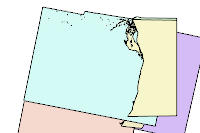

<Item title:"Chennai_rnfl" type:Feature Service owner:demo_deldev>

In [21]:
from IPython.display import display
for item in items:
    display(item)

## Working with layers

<Item title:"Lakes in Chennai" type:Feature Service owner:deldev>
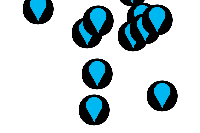

In [22]:
lakes = items[1]
lakes

In [112]:
lakes.layers

[<FeatureLayer url:"http://services6.arcgis.com/SMX5BErCXLM7eDtY/arcgis/rest/services/lakes/FeatureServer/0">]

## Visualize layers using map widget

In [113]:
m = gis.map('Chennai')
m

In [114]:
m.add_layer(lakes)

In [115]:
import time
for basemap in m.basemaps:
    print(basemap)
    m.basemap = basemap
    time.sleep(1)

streets
satellite
hybrid
topo
gray
dark-gray
oceans
national-geographic
terrain
osm


## Spatial analysis

In [5]:
lakemap = gis.map('Chennai')
lakemap.basemap = 'dark-gray'
lakemap

In [117]:
from arcgis.features.find_locations import trace_downstream
from arcgis.features.use_proximity import create_buffers

floodprone_buffer = create_buffers(trace_downstream(lakes), [1, 2], 
                                   units='Miles')

In [28]:
lakemap.add_layer(floodprone_buffer)

## Querying features

In [6]:
counties_item = arcgis_online.content.search('USA Counties', 'Feature Layer')[0]
counties_item

<Item title:"USA Counties" type:Feature Service owner:esri_dm>

In [7]:
counties = counties_item.layers[0]

In [8]:
ca_counties = counties.query(where="STATE_NAME='California'")

## Spatial dataframe

In [9]:
counties_df = ca_counties.df
counties_df

,AGE_10_14,AGE_15_19,AGE_20_24,AGE_25_34,AGE_35_44,AGE_45_54,AGE_55_64,AGE_5_9,AGE_65_74,AGE_75_84,...,POP10_SQMI,POP12_SQMI,POP2010,POP2012,RENTER_OCC,SQMI,STATE_NAME,VACANT,WHITE,geometry.rings
FID,,,,,,,,,,,,,,,,,,,,,
85,68473,72493,65339,122046,108500,108479,77285,68694,43502,23473,...,102.9,104.282870,839631,851089,101782,8161.35,California,29757,499766,"[[[-13119789.4732166, 4272899.44206061], [-131..."
95,11324,11356,13158,25589,21878,20282,12924,11564,6844,3809,...,109.9,111.427421,152982,155039,18904,1391.39,California,2634,83027,"[[[-13342775.4280577, 4356085.35107993], [-133..."
101,3888,4190,3362,6603,7095,10255,10625,3574,6553,3502,...,48.6,49.082334,64665,65253,9076,1329.46,California,8944,52033,"[[[-13667224.3154792, 4696180.98661009], [-136..."
105,1853,2107,2831,6337,5513,5447,4113,1595,1984,1041,...,7.4,7.422856,34895,35039,3468,4720.42,California,2652,25532,"[[[-13418482.3589672, 5039533.37601727], [-134..."
140,678845,753630,752788,1475731,1430326,1368947,1013156,633690,568470,345603,...,2402.3,2423.264150,9818605,9904341,1696455,4087.19,California,203872,4936599,"[[[-13149469.25, 3995666.625], [-13149495.5, 3..."
154,11755,12224,11032,20562,19167,19291,15833,11756,9868,5468,...,70.1,71.065672,150865,153025,15591,2153.29,California,5823,94456,"[[[-13337486.1875, 4418437.5625], [-13337507.5..."
169,14241,12798,10308,24836,36478,42055,40088,15481,23211,12425,...,480.2,486.100489,252409,255509,38573,525.63,California,8004,201963,"[[[-13691681.78125, 4611910], [-13691695.125, ..."
179,987,1026,827,1651,1828,3232,3283,821,2253,1186,...,12.5,12.613887,18251,18455,2466,1463.07,California,2495,16103,"[[[-13364133.625, 4464660.5], [-13364465.46875..."
191,5390,5613,4874,10704,10268,12476,14417,5259,7556,3983,...,25.0,25.083070,87841,88094,14344,3512.09,California,5378,67218,"[[[-13752510.6332503, 4689126.20285457], [-137..."


In [10]:
counties_df[counties_df.POP2012 < 20000][['NAME', 'POP2012']]

,NAME,POP2012
FID,,
179,Mariposa,18455
208,Modoc,9791
215,Mono,14418
440,Sierra,3226
462,Alpine,1148
501,Trinity,14063
563,Inyo,18611


In [11]:
ca_fc = arcgis_online.content.import_data(counties_df)

In [12]:
ca_map = arcgis_online.map("California")
ca_map

In [13]:
ca_map.add_layer(ca_fc)

In [15]:
ca_fc.layer.featureSet.geometryType

'esriGeometryPoint'

## Using Imagery layers

In [6]:
landsat_item = arcgis_online.content.search('"Landsat Multispectral"', 'Imagery Layer')[0]

In [7]:
landsat_item

<Item title:"Multispectral Landsat" type:Image Service owner:esri>

In [8]:
landsat = landsat_item.layers[0]

In [9]:
import pandas as pd
pd.DataFrame(landsat.key_properties()['BandProperties'])

,BandIndex,BandName,DatasetTag,WavelengthMax,WavelengthMin
0,0,CoastalAerosol,MS,450,430
1,1,Blue,MS,510,450
2,2,Green,MS,590,530
3,3,Red,MS,670,640
4,4,NearInfrared,MS,880,850
5,5,ShortWaveInfrared_1,MS,1650,1570
6,6,ShortWaveInfrared_2,MS,2290,2110
7,7,Cirrus,MS,1380,1360


## Visualizing imagery layers

In [19]:
landsatmap = arcgis_online.map('Zurich, Switzerland')
landsatmap

In [120]:
landsatmap.add_layer(landsat)

In [121]:
from arcgis.raster.functions import *

In [122]:
import time 

for rasterfunc in landsat.properties.rasterFunctionInfos[:9]:
    print(rasterfunc.name)
    landsatmap.add_layer(apply(landsat, rasterfunc.name))
    time.sleep(2)

Agriculture with DRA
Bathymetric with DRA
Color Infrared with DRA
Geology with DRA
Natural Color with DRA
Short-wave Infrared with DRA
Agriculture
Bathymetric
Color Infrared


## Using Raster Functions

In [16]:
zurichmap = arcgis_online.map('Zurich, Switzerland')
zurichmap

In [17]:
land_water_boundary = stretch(extract_band(landsat, [4, 5, 3]),
                              stretch_type='percentclip', 
                              min_percent=1, max_percent=1, gamma=[1, 1, 1], dra=True)

NameError: name 'stretch' is not defined

In [125]:
zurichmap.add_layer(land_water_boundary)

### Spectral Profile

In [10]:
spectralmap = gis.map('Zurich, Switzerland')
spectralmap.add_layer(landsat)
spectralmap

AttributeError: 'Figure' object has no attribute 'set'

AttributeError: 'Figure' object has no attribute 'set'

In [13]:
from bokeh.models import Range1d
from bokeh.plotting import figure, show, output_notebook
output_notebook()

def get_samples(mw, g):
    mw.draw(g)
    samples = landsat.get_samples(g, pixel_size=30)
    values = samples[0]['value']
    vals = [float(int(s)/100000) for s in values.split(' ')]
    
    x = ['1','2', '3', '4', '5', '6', '7', '8']
    y = vals
    p = figure(title="Spectral Profile", x_axis_label='Spectral Bands', 
               y_axis_label='Data Values', width=600, height=300)
    p.line(x, y, legend="Selected Point", line_color="red", line_width=2)
    p.circle(x, y, line_color="red", fill_color="white", size=8)
#     p.set(y_range=Range1d(0, 1.0))

    show(p)

Loading BokehJS ...

In [14]:
spectralmap.on_click(get_samples)
print('Click anywhere on the map to plot the spectral profile for that location.')

Click anywhere on the map to plot the spectral profile for that location.


# Weighted overlay analysis

In [46]:
portal = GIS('https://dev004546.esri.com/portal', 'djohnsonRA',  'M62evVB12pl') #getpass())

<Item title:"USGS NED 30m" type:Image Service owner:djohnsonRA>
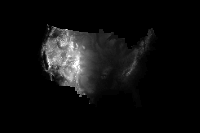

In [47]:
item_dem = portal.content.search('USGS NED 30m')[0]
item_dem

<Item title:"Human Modified Index" type:Image Service owner:djohnsonRA>
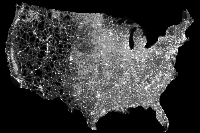

In [48]:
item_hmi = portal.content.search('Human Modified Index')[0]
item_hmi

## Create layers to work with

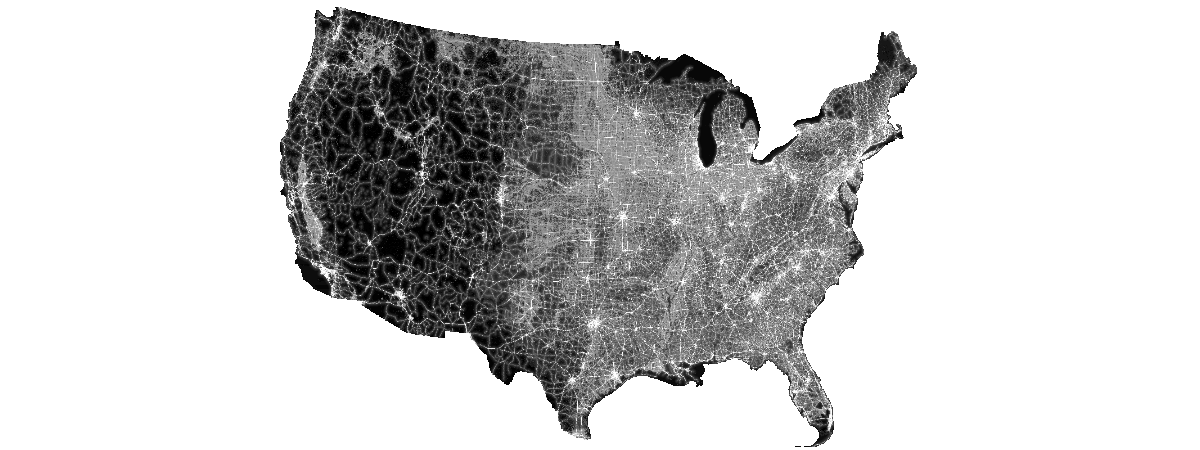

In [52]:
lyr_hmi = item_hmi.layers[0]
lyr_hmi

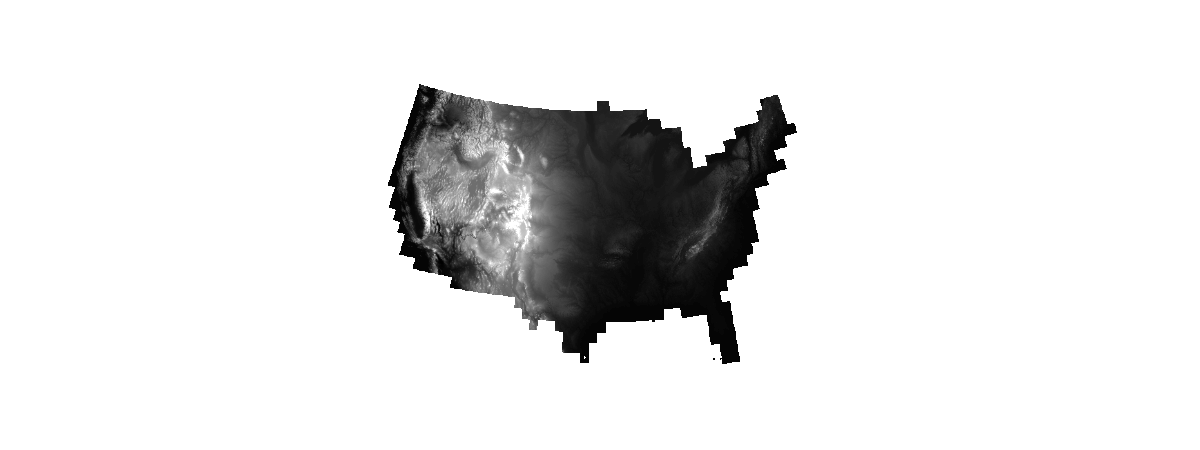

In [51]:
lyr_dem = item_dem.layers[0]
lyr_dem

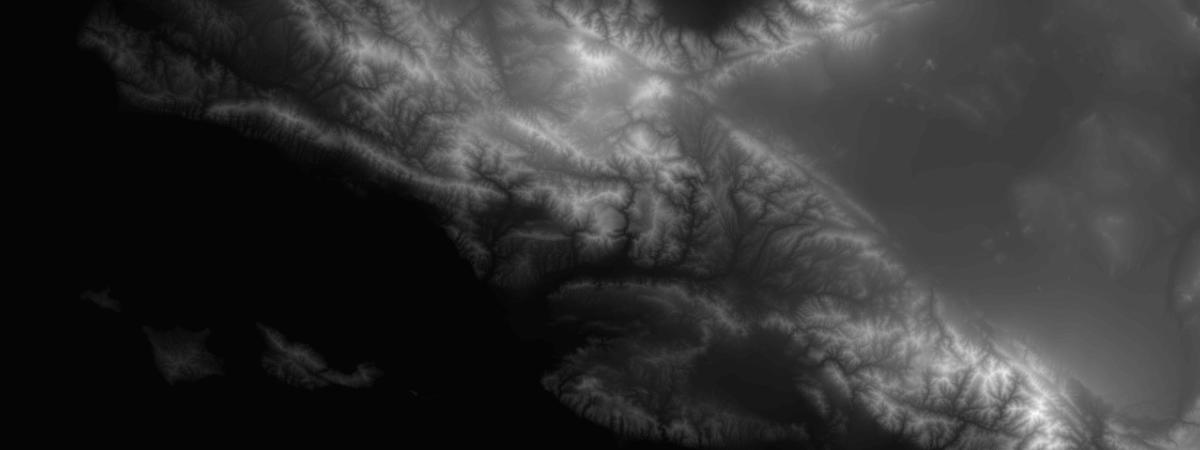

In [155]:
from arcgis.geocoding import geocode

ventura_county = geocode('Ventura County', out_sr=lyr_dem.properties.spatialReference)[0]
lyr_dem.extent = ventura_county['extent']
lyr_dem

## Clip layer to area of interest

In [136]:
ventura_geom = list(counties_df[counties_df.NAME == 'Ventura']['SHAPE'])[0]
ventura_geom.spatial_reference = counties.container.properties.spatialReference

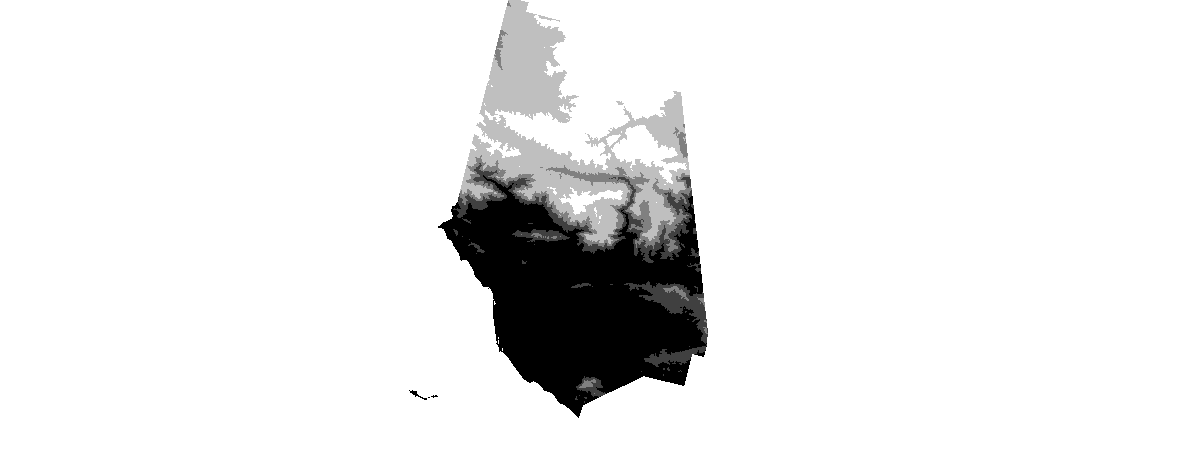

In [141]:
elv = remap(clip(lyr_dem, geom),
             input_ranges=[-90,250, 250,500, 500,750, 750,1000, 1000,1500, 
                           1500,2000, 2000,2500, 2500,3000, 3000,5000],
             output_values=[1,2,3,4,5,6,7,8,9])
elv

In [70]:
cmap =  [[1, 38, 115, 0], [2, 86, 148, 0], [3, 0x8B, 0xB5, 0], [4,  0xC5, 0xDB, 0],
         [5, 255, 255, 0], [6, 0xFF, 0xC3, 0], [7, 0xFA, 0x8E, 0], [8, 0xF2, 0x55, 0],
         [9, 0xE6, 0, 0]]

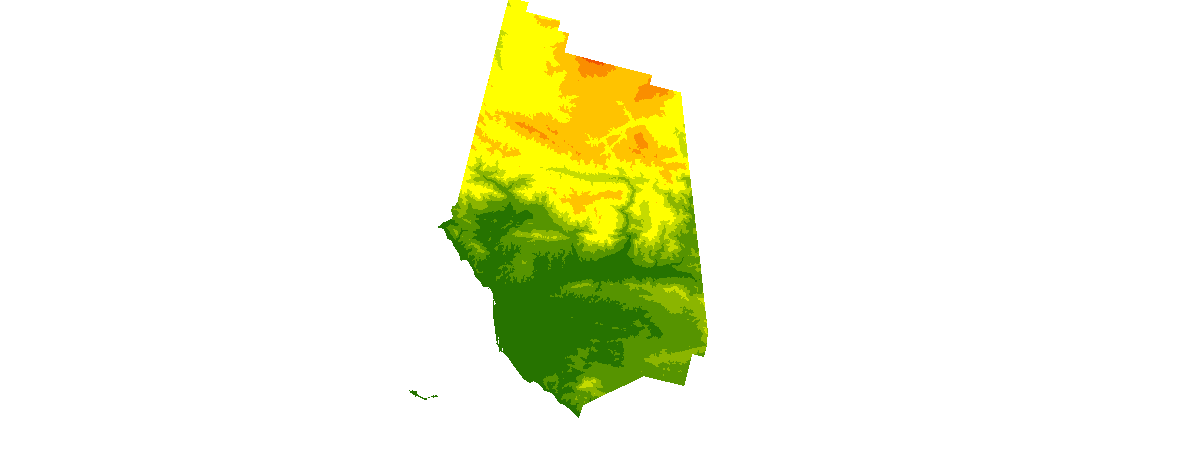

In [150]:
colormap(elv, colormap=cmap)

In [144]:
slp = remap(clip(slope(lyr_dem, slope_type='DEGREE', z_factor=1), geom),
              input_ranges=[0,1, 1,2, 2,3, 3,5, 5,7, 7,9, 9,12, 12,15, 15,100],
              output_values=[1,2,3,4,5,6,7,8,9])

hmi = remap(clip(lyr_hmi, geom),
            input_ranges=[0.0,0.1, 0.1,0.2, 0.2,0.3, 0.3,0.4, 0.4,0.5,
                          0.5,0.6, 0.6,0.7, 0.7,0.8, 0.8,1.1],
            output_values=[1,2,3,4,5,6,7,8,9])

In [151]:
from ipywidgets import *

maps = []
labels = []
items_layout = Layout(flex='1 1 auto', width='auto')
for lyr in [elv, slp, hmi]:
    countymap = gis.map('Ventura County, CA', zoomlevel=8)
    countymap.add_layer(colormap(lyr, colormap=cmap))
    countymap.layout=Layout(flex='1 1', padding='3px')
    maps.append(countymap)
    
layout=Layout(height='300px')
display(HBox([maps[0], maps[1], maps[2]], layout=layout))
display(HBox(children=[Button(description='Elevation', layout=items_layout, button_style='danger'),
                       Button(description='Slope', layout=items_layout, button_style='danger'),
                       Button(description='HMI', layout=items_layout, button_style='danger')], layout=Layout(width='100%')))

## Using Map Algebra for weighted overlay analysis

In [110]:
surface = 0.34 * slp + 0.33 * elv + 0.33 * hmi

In [109]:
r_out = colormap(surface, colormap=cmap)

In [92]:
imagery_map = gis.map('Ventura County, CA')
imagery_map.add_layer(r_out)
imagery_map

## Recap of weighted overlay analysis

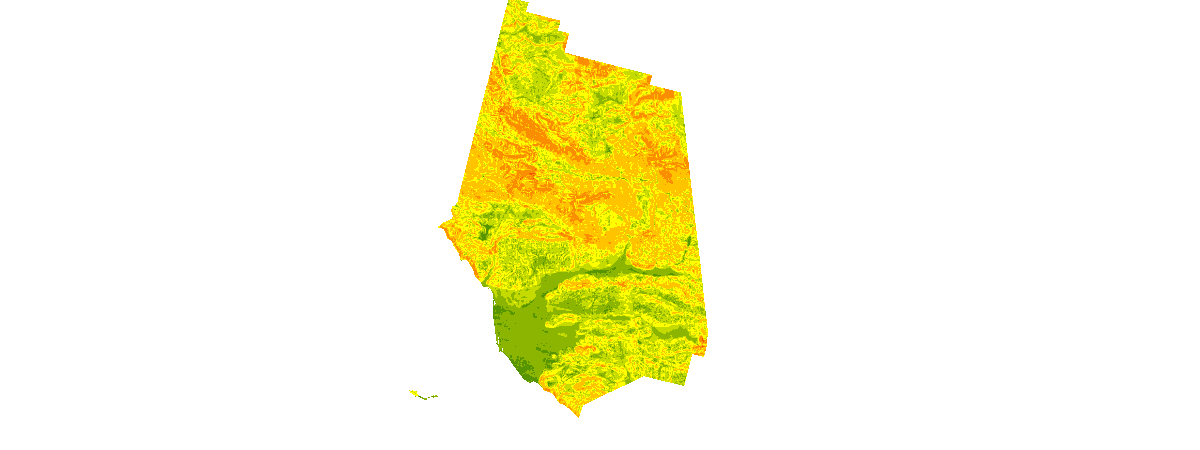

In [158]:
# Generate a final result from start to finish in a single operation.
# In this example, slope is assigned a higher weight than elevation or degree of human modification
# on the assumption that slope would have a greater affect of travel cost than the other variables.
weighted_overlay_2 = colormap(
    raster=
    (
        # Elevation layer
        0.25 * remap(raster=clip(raster=lyr_dem, geometry=geom), 
                    input_ranges=[-90,250, 250,500, 500,750, 750,1000, 1000,1500, 1500,2000, 2000,2500, 2500,3000, 3000,5000],
                    output_values=[1,2,3,4,5,6,7,8,9]) 
        + 
        # Slope layer
        0.5 * remap(raster=clip(raster=slope(lyr_dem, slope_type='DEGREE', z_factor=1), geometry=geom), 
                     input_ranges=[0,1, 1,2, 2,3, 3,5, 5,7, 7,9, 9,12, 12,15, 15,100],
                     output_values=[1,2,3,4,5,6,7,8,9]) 
        + 
        # Human modified index layer
        0.25 * remap(raster=clip(raster=lyr_hmi, geometry=geom),
                     input_ranges=[0.0,0.1, 0.1,0.2, 0.2,0.3, 0.3,0.4, 0.4,0.5,0.5,0.6, 0.6,0.7, 0.7,0.8, 0.8,1.1],
                     output_values=[1,2,3,4,5,6,7,8,9])
    ),
    colormap=cmap
)
weighted_overlay_2

## What we covered

* GIS Module
* Features and spatial analysis
* Imagery and raster analysis

## There's a lot more!

* Geoanalysics (bigdata analysis)
* Distributed raster analysis
* Geoprocessing
* Geocoding, batch geocoding, reverse geocoding
* Network analysis, routing, ...

## Thank you!

* ### Website - http://developers.arcgis.com/python
* ### GitHub - http://github.com/esri/arcgis-python-api